# Pulsar Timing Variations:
For pulsars in binary systems that move along eccentric orbits, the original frequency of their signal is experiencing a Doppler shift with respect to an observer situated on Earth.

Gong and Yan (2014, https://arxiv.org/abs/1401.6530v1) describe the drift in signal frequency with respect to an observer as:

## $\Delta\nu = K\nu_e[cos(\omega + f) + ecos(\omega)]$

With 

## $K = \frac{2\pi asin(i)}{cP\sqrt{1-e^2}}$

Where 

* $\nu_e$ = Pulse of original frequency
* $f$ = True anomaly
* $e$ = Eccentricity
* $\omega$ = Argument of periastron
* $i$ = Orbital inclination
* $a$ = Semi-major axis
* $c$ = Speed of light
* $P$ = Orbital period

The true anomaly is described as

# $f = 2arctan(\sqrt{\frac{1+e}{1-e}}tan(E/2))$

Where $E$ is the eccentric anomaly.

The eccentric anomaly $E$ can be decribed in terms of the mean anomaly $M$ as

# $M = E - esin(E) = \frac{2\pi}{P}(t - T_0)$

With

* $P$ = Orbital period
* $t$ = Time point on the orbit
* $T_0$ = Time at periastron

## Semi-major axis of PSR B1259-63
Given that the orbital period of PSR B1259-63 is approximately 1237 days, its mass is $1.4 M_\odot$ and that the mass of SS 2883 is approximately $22.5 M_\odot$, using Kepler's 3rd law, the semi-major axis is
# $a^3 = \frac{P^2G(M + m)}{4\pi^2}, a \sim 1396R_\odot$

With

* $G$ = Gravitational constant
* $M$ = Mass of SS 2883
* $m$ = Mass of PSR B1259-63

In [1]:
#Packages
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import astropy.units as u
import astropy.constants as con
import ipywidgets as widgets
from IPython.display import display
from scipy.optimize import curve_fit
from scipy.optimize import minimize
import emcee
import corner
from IPython.display import display, Math
from scipy.optimize import fsolve

In [2]:
#Constants in cgs units
R_sun_cgs = con.R_sun.cgs.value   #Radius of sun in cgs
M_sun_cgs = con.M_sun.cgs.value   #Mass of the sun in cgs
yr_to_sec = u.yr.to(u.s)          #Year to seconds
kms_cgs = (u.km/u.s).to(u.cm/u.s) #Kms in cgs
m_p_cgs = con.m_p.cgs.value       #Mass of proton in cgs
G_cgs = con.G.cgs.value           #Gravitational constant in cgs   
k_B_cgs = con.k_B.cgs.value       #Boltzmann constant in cgs
AU_cgs = (con.au.cgs.value)       #AU in cgs
pc_to_cm = u.pc.to(u.cm)          #PC to cm
c_cgs = con.c.to(u.cm/u.s)        #Speed of light in cgs

In [3]:
def nu_shift(t, P, a_Rsun, e, i, omega, nu_pulsar, T0):
    '''
    This function calculates the spin frequency Doppler shift of a pulsar signal along its orbit.
    -------------------------------------------------------------------------------------
    Parameters:

    t         [array] -> Time (s)
    P         [float] -> Orbital period (s)
    a_Rsun    [float] -> Semimajor axis (solar radii)
    e         [float] -> Eccentricity
    i         [float] -> Orbital inclination (rad)
    omega     [float] -> Argument of Periastron (rad)
    nu_pulsar [float] -> Intrinsic spin frequency of the pulsar (Hz)
    T0        [float] -> Time at periastron (s)
    --------------------------------------------------------------------------------------
    Returns:

    The spin frequency Doppler shift.
    '''
    a = a_Rsun * R_sun_cgs                                                 #Converting the semimajor axis from solar radii to cm

    def Esolver(E, M_i, e):
        return E - e * np.sin(E) - M_i                                     #Function to solve the eccentric anomaly in terms of mean anomaly

    M = (2*np.pi/P)*(t-T0)                                                 #Defining the mean anomaly

    E = np.array([fsolve(Esolver, M_i, args=(M_i, e))[0] for M_i in M])    #Solving the for the eccentric anomaly

    f = 2 * np.arctan2(np.sqrt(1+e)*np.sin(E/2), np.sqrt(1-e)*np.cos(E/2)) #Defining the true anomaly

    K = (2*np.pi*a*np.sin(i))/(c_cgs*P*np.sqrt(1-e**2))                    #Defining the semi-amplitude

    Delta_nu = nu_pulsar * K * (np.cos(omega+f) + e*np.cos(omega))         #Defining the spin frequency Doppler shift

    return Delta_nu

Text(0, 0.5, 'Spin Frequency Doppler Shift $(Hz)$')

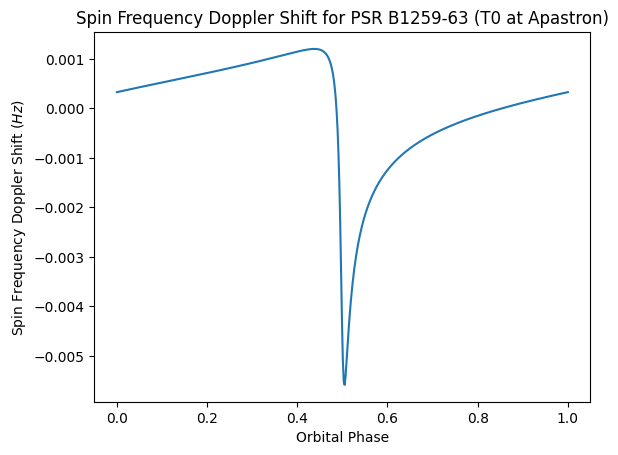

In [4]:
P = 1237*24*60*60          #Orbital period (seconds)
a_Rsun = 1396              #Semi major axis
e = 0.87                   #Ecccentricity
i = np.deg2rad(24.9)       #Inclination
om = np.deg2rad(138)       #Argument of periastron
nu_pulsar = 20.9           #PSR B1259-63 spin frequency

t = np.linspace(0, P, 512) #Orbital time array

Delta_nu = nu_shift(t=t, P=P, a_Rsun=a_Rsun, e=e, i=i, omega=om, nu_pulsar=nu_pulsar, T0=P/2)

#Plotting
plt.plot(t/P, Delta_nu)
plt.title('Spin Frequency Doppler Shift for PSR B1259-63 (T0 at Apastron)')
plt.xlabel('Orbital Phase')
plt.ylabel('Spin Frequency Doppler Shift $(Hz)$')

# Comparing our Model with MeerKAT data
The orbital phases are translated as
## $\phi = 2\pi(\frac{\Delta t}{P}) = 2\pi(\frac{\Delta t}{1237 days})$

# -------------------------------------------------------------------------------------------